In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.465, 0.496, 0.426), (0.227, 0.221, 0.223)),
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.465, 0.496, 0.426), (0.227, 0.221, 0.223)),
])

In [ ]:
# Roll No  - M22AIE206  ; Last byte is 6  , 6 % 3 == 0 ; Choosing STL10
dataset_name = "STL10"
train_data = datasets.STL10(root='./data', split='train', download=True, transform=transform_train)
test_data = datasets.STL10(root='./data', split='test', download=True, transform=transform_test)


100%|██████████| 2640397119/2640397119 [02:53<00:00, 15246957.89it/s]


Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


In [ ]:
train_data = Subset(train_data, range(100))
test_data = Subset(test_data, range(30))

In [ ]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [ ]:
model = torchvision.models.resnet101(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

In [ ]:
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
#optimizers
optimizers = {
    "Adam": optim.Adam(model.parameters(), lr=0.001),
    "Adagrad": optim.Adagrad(model.parameters(), lr=0.01),
    "RMSprop": optim.RMSprop(model.parameters(), lr=0.001)
}

In [ ]:
def train(optimizer):
    model.train()
    r_loss = 0.0
    correct_value = 0
    total_value = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        r_loss += loss.item()
        _, predicted = outputs.max(1)
        total_value += targets.size(0)
        correct_value += predicted.eq(targets).sum().item()

    train_loss = r_loss / len(train_loader)
    train_accuracy = 100. * correct_value / total_value
    return train_loss, train_accuracy

def test():
    model.eval()
    test_loss = 0
    correctTest_value = 0
    totalTest_value = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            totalTest_value += targets.size(0)
            correctTest_value += predicted.eq(targets).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = 100. * correctTest_value / totalTest_value
    return test_loss, test_accuracy

Optimizer: Adam
Epoch 1/5: Model Train Loss: 2.6156 | Train Accuracy: 24.00% | Model Test Loss: 223.1881 | Model Test Acc: 10.00%
Epoch 2/5: Model Train Loss: 2.5007 | Train Accuracy: 20.00% | Model Test Loss: 7009.3489 | Model Test Acc: 16.67%
Epoch 3/5: Model Train Loss: 2.1837 | Train Accuracy: 26.00% | Model Test Loss: 3210.0449 | Model Test Acc: 10.00%
Epoch 4/5: Model Train Loss: 2.1302 | Train Accuracy: 35.00% | Model Test Loss: 347.9223 | Model Test Acc: 6.67%
Epoch 5/5: Model Train Loss: 1.9542 | Train Accuracy: 35.00% | Model Test Loss: 9.8401 | Model Test Acc: 16.67%


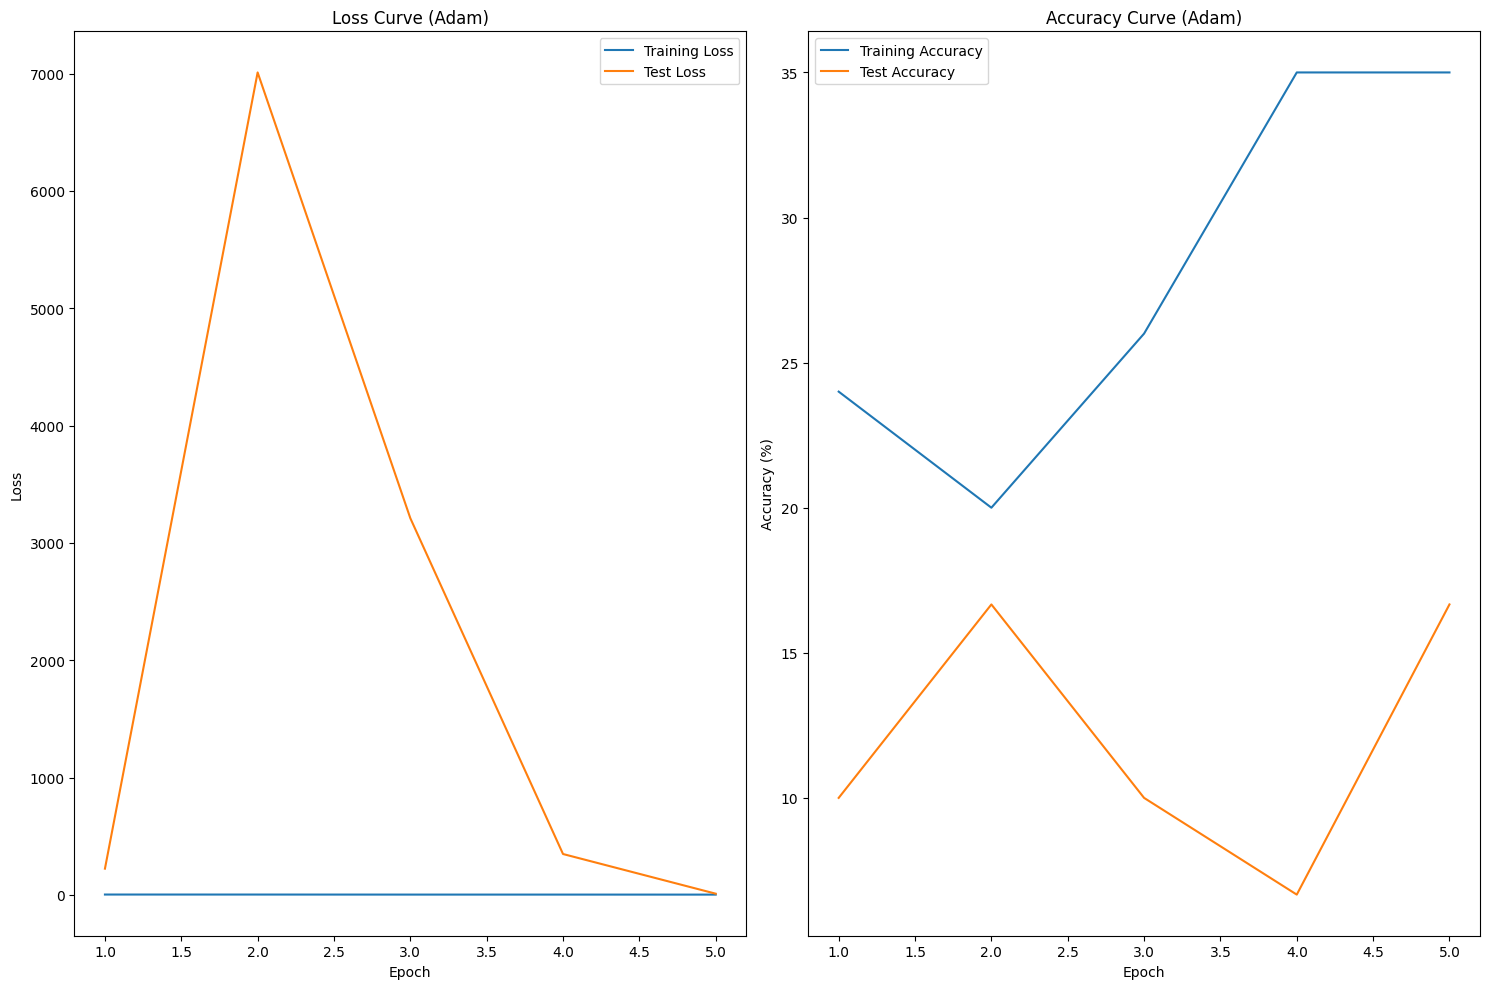

Optimizer: Adagrad
Epoch 1/5: Model Train Loss: 3.4276 | Train Accuracy: 16.00% | Model Test Loss: 5814.8789 | Model Test Acc: 10.00%
Epoch 2/5: Model Train Loss: 2.5071 | Train Accuracy: 16.00% | Model Test Loss: 107.1009 | Model Test Acc: 10.00%
Epoch 3/5: Model Train Loss: 2.3230 | Train Accuracy: 15.00% | Model Test Loss: 2.4103 | Model Test Acc: 0.00%
Epoch 4/5: Model Train Loss: 2.1780 | Train Accuracy: 17.00% | Model Test Loss: 2.2336 | Model Test Acc: 30.00%
Epoch 5/5: Model Train Loss: 2.0329 | Train Accuracy: 25.00% | Model Test Loss: 20.1446 | Model Test Acc: 3.33%


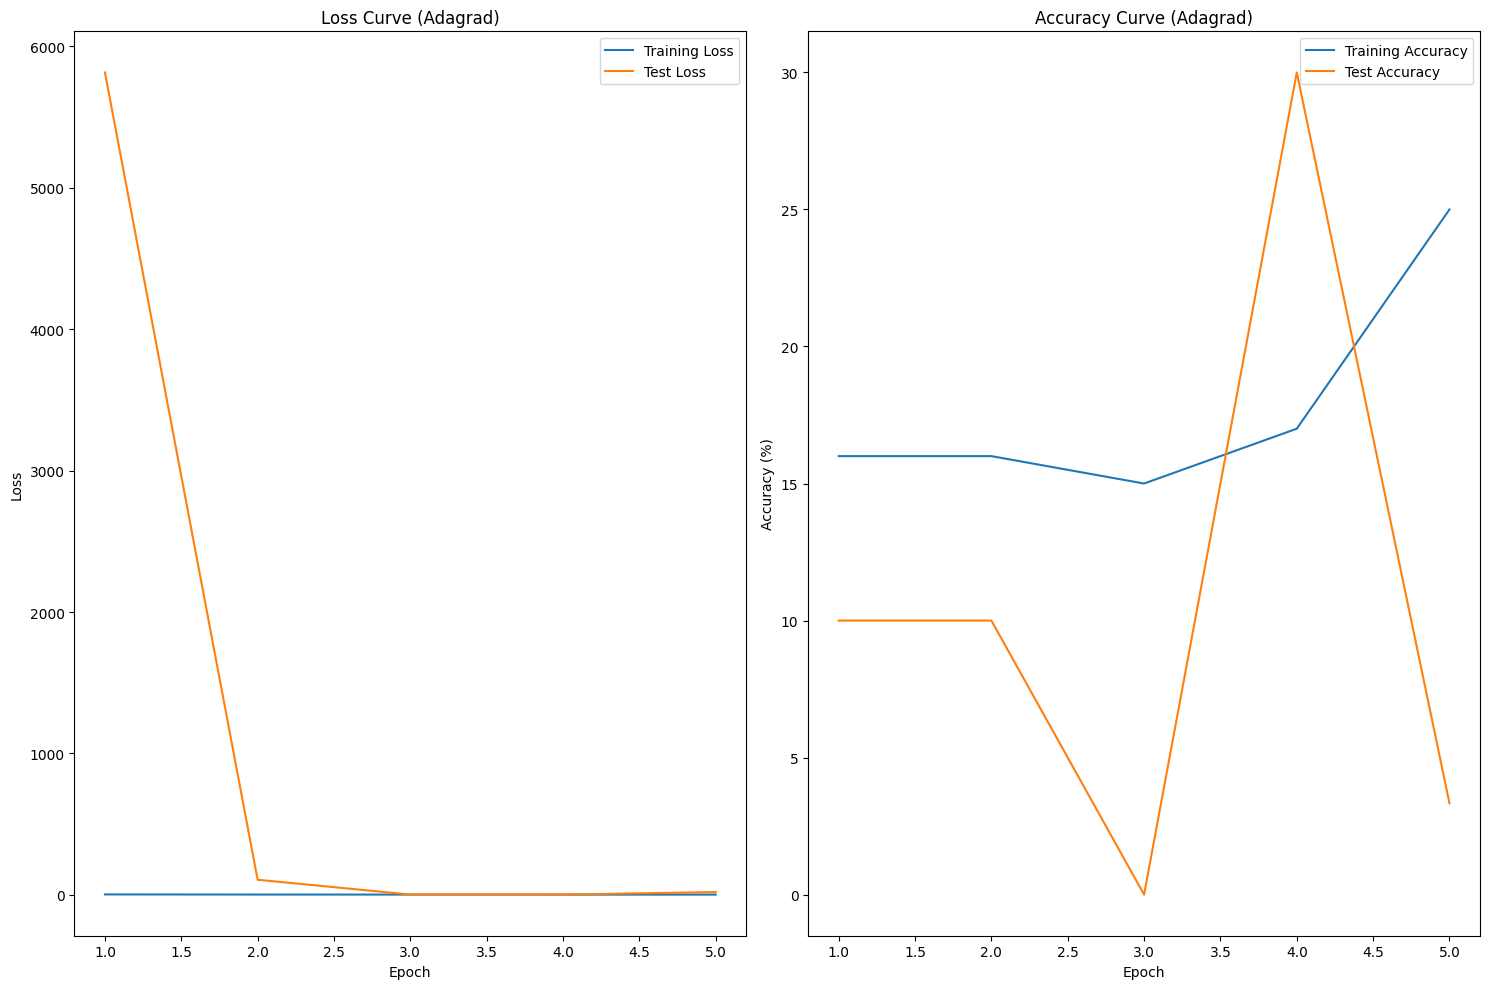

Optimizer: RMSprop
Epoch 1/5: Model Train Loss: 2.8636 | Train Accuracy: 8.00% | Model Test Loss: 1593.6111 | Model Test Acc: 16.67%
Epoch 2/5: Model Train Loss: 2.4993 | Train Accuracy: 14.00% | Model Test Loss: 2.2903 | Model Test Acc: 10.00%
Epoch 3/5: Model Train Loss: 2.3187 | Train Accuracy: 12.00% | Model Test Loss: 17.2193 | Model Test Acc: 10.00%
Epoch 4/5: Model Train Loss: 2.2173 | Train Accuracy: 17.00% | Model Test Loss: 3.7169 | Model Test Acc: 13.33%
Epoch 5/5: Model Train Loss: 2.1292 | Train Accuracy: 18.00% | Model Test Loss: 5.3381 | Model Test Acc: 10.00%


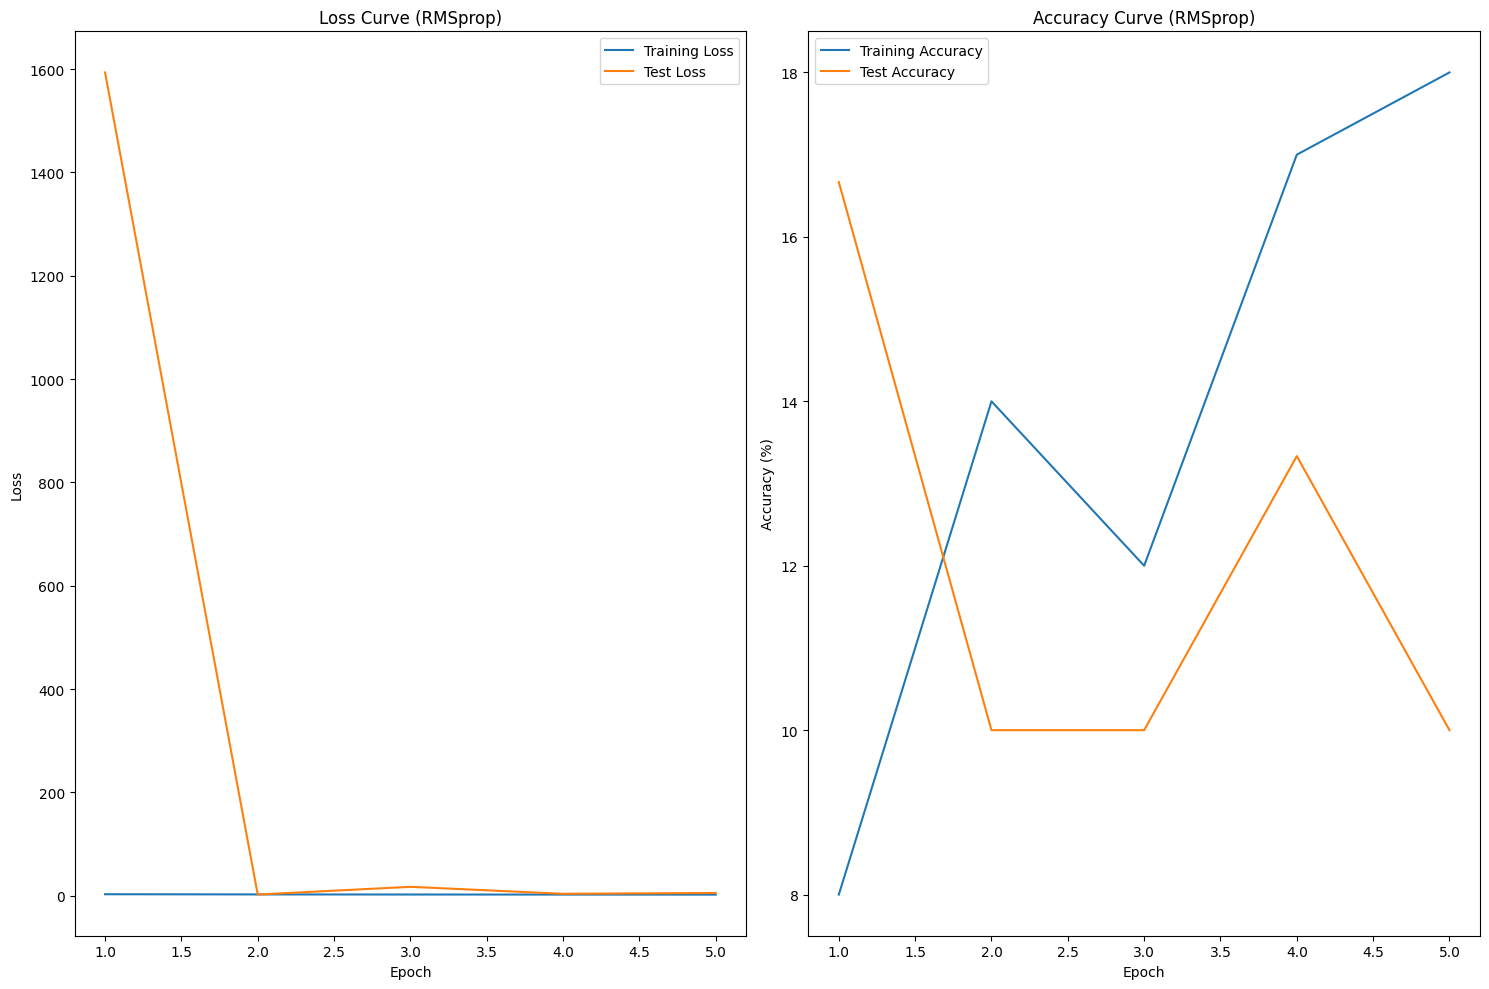

In [ ]:
epochs = 5
for optimizer_name, optimizer in optimizers.items():
    Modeltrain_loss = []
    Modeltrain_accuracy = []
    Modeltest_loss = []
    Modeltest_accuracy = []

    print(f"Optimizer: {optimizer_name}")
    for epoch in range(epochs):
        train_loss, train_accuracy = train(optimizer)
        test_loss, test_accuracy = test()

        Modeltrain_loss.append(train_loss)
        Modeltrain_accuracy.append(train_accuracy)
        Modeltest_loss.append(test_loss)
        Modeltest_accuracy.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs}: Model Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}% | "
              f"Model Test Loss: {test_loss:.4f} | Model Test Acc: {test_accuracy:.2f}%")

    # Plotting
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), Modeltrain_loss, label='Training Loss')
    plt.plot(range(1, epochs + 1), Modeltest_loss, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve ({optimizer_name})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), Modeltrain_accuracy, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), Modeltest_accuracy, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Accuracy Curve ({optimizer_name})')
    plt.legend()

    plt.tight_layout()
    plt.show()